In [1]:
import pandas            as pd
import numpy             as np
import datetime          as dt
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings

from unidecode           import unidecode

In [2]:
sns.set(rc = {'patch.linewidth': 0.0})

In [3]:
ipos = pd.read_csv('data/ipos.csv')
ipos.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,COMPANY DATA,NaN,NaN,NaN,OFFERING INFORMATION,NaN,NaN,NaN,NaN,...,NaN,INVESTORS PARTICIPATION (%) ³,NaN,NaN,NaN,NaN,TOTAL VALUE (R$),NaN,NaN,NaN
1,NaN,TRADING NAME,LISTING SEGMENT,INDUSTRY CLASSIFICATION,UNDERWRITER,CLASSIFICATION,TIPO,PRICE FIXING DATE (DATE/MONTH/YEAR),PRICE PER SHARE / UNIT / BDR 4,DATE OF NEGOTIATION,...,TOTAL\n(VALUE USD),RETAIL,INSTITUTIONAL,FOREIGNERS,OTHERS,NaN,YEAR,IPO,FOLLOW-ON,TOTAL
2,NaN,CCR RODOVIAS,NM,Road Concessions,UBS,FOLLOW-ON,ICVM 400,4/26/2004,"R$ 23,50",27/04/04,...,120.003.842,7%,18%,75%,1%,NaN,2004,4.487.065.024,4.317.579.322,8.804.644.346
3,NaN,NATURA,NM,Personal Hygiene,UBS,IPO,ICVM 400,5/24/2004,"R$ 36,50",26/05/04,...,243.230.094,14%,15%,67%,4%,NaN,2005,5.447.335.660,8.488.868.795,13.936.204.455
4,NaN,GOL,N2,Civil Aviation,Morgan Stanley,IPO,ICVM 400,6/23/2004,"R$ 26,57",24/06/04,...,282.996.616,10%,13%,75%,1%,NaN,2006,15.373.613.634,15.062.683.258,30.436.296.892


In [4]:
# Removing unecessary rows and columns
ipos.dropna(axis=1, how='all', inplace=True) 
ipos.drop(ipos.columns[-4:], axis=1,inplace=True) 
ipos.drop(ipos.tail(6).index, inplace=True) 

In [5]:
# Correct columns naming
ipos.columns = [unidecode(col_name.lower().replace(' ', '_')) for col_name in ipos.iloc[1]] 
ipos.rename(columns = {'price_per_share_/_unit_/_bdr_4': 'price_per_share',
                       '_number_of_investors_': 'total_number_of_investors',
                       'date_of_negotiation': 'start_date_of_negotiation',
                       '_primary_offering_(value_r$)_': 'primary_offering_r$',
                       '_secondary_offering_(value_r$)_': 'secondary_offering_r$',
                       'total\n(value_r$)': 'total_value_r$',
                       'price_fixing_date_(date/month/year)': 'price_fixing_date'
                       },
           inplace = True)
ipos.drop([0,1], inplace=True)
ipos.head()

,trading_name,listing_segment,industry_classification,underwriter,classification,tipo,price_fixing_date,price_per_share,start_date_of_negotiation,number_of_individuals,total_number_of_investors,primary_offering_r$,secondary_offering_r$,total_value_r$,total\n(value_usd),retail,institutional,foreigners,others
2,CCR RODOVIAS,NM,Road Concessions,UBS,FOLLOW-ON,ICVM 400,4/26/2004,"R$ 23,50",27/04/04,1.010,1.514,375.000.005,-,375.000.005,120.003.842,7%,18%,75%,1%
3,NATURA,NM,Personal Hygiene,UBS,IPO,ICVM 400,5/24/2004,"R$ 36,50",26/05/04,4.376,5.460,-,768.120.637,768.120.637,243.230.094,14%,15%,67%,4%
4,GOL,N2,Civil Aviation,Morgan Stanley,IPO,ICVM 400,6/23/2004,"R$ 26,57",24/06/04,11.274,12.380,498.187.500,379.951.000,878.138.500,282.996.616,10%,13%,75%,1%
5,ALL AMER LAT,N2,Railways,Pactual,IPO,ICVM 400,6/23/2004,"R$ 46,50",25/06/04,3.275,4.198,267.375.000,320.850.000,588.225.000,189.164.201,8%,20%,71%,1%
6,WEG,N1,"Engines, Compressors and Others",Bradesco BBI,FOLLOW-ON,ICVM 400,9/3/2004,"R$ 7,20",06/09/04,5.130,5.708,-,319.384.800,319.384.800,109.596.047,30%,24%,41%,5%


In [6]:
# Filter just IPOs
ipos = ipos[ipos.classification == 'IPO']

In [7]:
ipos.dtypes

trading_name                 object
listing_segment              object
industry_classification      object
underwriter                  object
classification               object
tipo                         object
price_fixing_date            object
price_per_share              object
start_date_of_negotiation    object
number_of_individuals        object
total_number_of_investors    object
primary_offering_r$          object
secondary_offering_r$        object
total_value_r$               object
total\n(value_usd)           object
retail                       object
institutional                object
foreigners                   object
others                       object
dtype: object

In [8]:
# Change datatypes
ipos['start_date_of_negotiation'] = pd.to_datetime(ipos['start_date_of_negotiation'])
for col in ['total_number_of_investors', 'number_of_individuals', 'primary_offering_r$',
            'secondary_offering_r$', 'total_value_r$']:
    ipos[col] = (
        ipos[col]
        .str.replace('-','0')
        .str.replace('.','')
        .astype(int))
for col in ['retail', 'institutional', 'foreigners', 'others']:
    ipos[col] = (
        ipos[col]
        .str.rstrip('%')
        .astype('float')) 

In [9]:
# Remove currency and change datatype
ipos['price_per_share'] = ipos['price_per_share'].replace('[R$]','', regex=True)
ipos['price_per_share'] = ipos['price_per_share'].replace('\.','', regex=True)
ipos['price_per_share'] = ipos['price_per_share'].replace(',','.', regex=True).astype(float)

# Remove superscrips
import re
ipos['trading_name'] = ipos['trading_name'].apply(lambda row: re.sub(r'[¹²³]', '', row))

# Strip string
ipos['trading_name'] = ipos['trading_name'].str.strip()

In [10]:
# Create columns
ipos['start_year_of_negotiation'] = ipos['start_date_of_negotiation'].dt.year

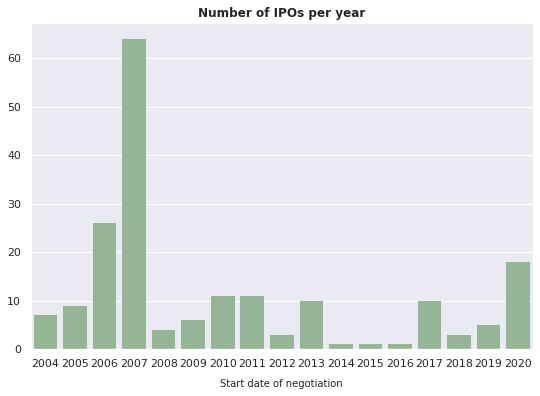

In [11]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='start_year_of_negotiation',
                   data=ipos,
                   color='darkseagreen')
ax = plt.title('Number of IPOs per year', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Start date of negotiation', labelpad = 10, fontsize = 10)
ax = plt.ylabel('')  

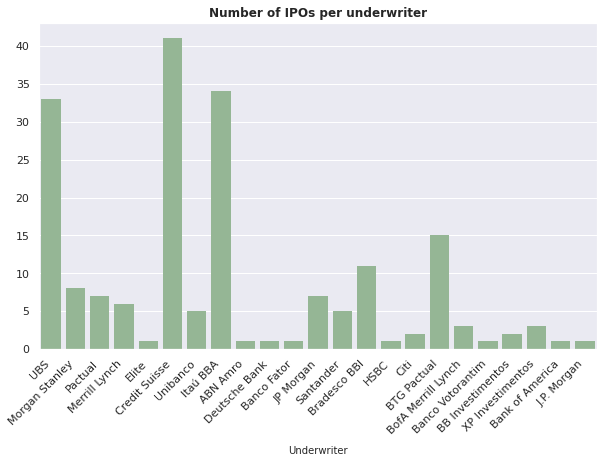

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='underwriter',
                   data=ipos,
                   color='darkseagreen')
ax = plt.title('Number of IPOs per underwriter', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Underwriter', labelpad = 10, fontsize = 10)
ax = plt.ylabel('')  
ax = plt.xticks(rotation = 45, ha='right')

In [13]:
# Get data about Economic Sectors
from pandas import ExcelFile
xls = ExcelFile('data/industry_classification.xlsx')
sectors = xls.parse(xls.sheet_names[0])
sectors.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,INDUSTRY CLASSIFICATION OF COMPANIES LISTED AT B3,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [14]:
# Correct columns naming
sectors.rename(columns={
    'Unnamed: 0': 'industrial_sector',
    'Unnamed: 1': 'subscetor',
    'Unnamed: 2': 'industry_classification',
    'Unnamed: 3': 'code_industrial_sector',
    'Unnamed: 4': 'listing_segment'},
    inplace = True)

In [15]:
# Removing unecessary rows and columns
sectors.drop(sectors.head(7).index, inplace=True)
sectors.drop(sectors.tail(18).index, inplace=True)

In [16]:
# Filter just Economic Sectors names
sectors = sectors[(sectors.industry_classification.isnull() == False) & (sectors.code_industrial_sector.isnull() == True)]
# Droping unecessary columns
sectors.drop(sectors.columns[-2:], axis=1, inplace=True)
# Fill missing data
sectors[['industrial_sector','subscetor']] = sectors[['industrial_sector','subscetor']].fillna(method='ffill')
# Correct names
sectors["industry_classification"] = sectors["industry_classification"].replace(
    'Medical and Hospitalar Services,','Medical and Hospitalar Services, Analysis and Diagnostics'
)
# Strip strings
sectors["industry_classification"] = sectors["industry_classification"].str.strip()

In [17]:
ipos["industry_classification"] = ipos["industry_classification"].str.strip()
ipos["industry_classification"] = ipos["industry_classification"].str.replace('And','and')
ipos["industry_classification"] = ipos["industry_classification"].replace(
    {
        'Personal Hygiene': 'Personal Care Products',
        'Civil Aviation': 'Airlines',
        'Railways': 'Railroads',
        'Eletric Utilities': 'Electric Utilities',
        'Medical Products': 'Medical and Hospitalar Services, Analysis and Diagnostics',
        'Food': 'Other Food Manufacturing',
        'Diversified Products': 'Diversified Retailers',
        'Rental Cars': 'Car Rental',
        'Med Hosp Serv. Anal and Diagnostics': 'Medical and Hospitalar Services, Analysis and Diagnostics',
        'Apparel. Fabric and Footwear': 'Apparel, Fabric and Footwear',
        'Exploration. Refining and Distribution': 'Exploration, Refining and Distribution',
        'Residential Construction': 'Real Estate Development',
        'Pay-TV': 'Telecommunications',
        'And': 'and',
        'Services and Programs': 'Software and Services',
        'Education Services': 'Educational Services',
        'Books. Magazines and Newspapers': 'Educational Services',
        'Sugar - Ethanol': 'Sugar and Alcohol',
        'Furniture': 'Home Furnishing',
        'Exploration and Refining': 'Exploration, Refining and Distribution',
        'Exploration and/or Refining': 'Exploration, Refining and Distribution',
        'Road Concessions': 'Toll Roads and Highways',
        'Machinery and Equipment': 'Equipment and Services',
        'Dairy Products': 'Other Food Manufacturing',
        'Warehouseing and storage': 'Warehousing and Storage',
        'Eletric Equipment': 'Machines and Industrial Equipments',
        'Fixed Line Communications': 'Telecommunications',
        'Computers and Equipment': 'Hardware and Equipments',
        'Diversified Holdings': 'Holdings - Diversified',
        'Engines, Compressors and Others': 'Equipment and Services',
        'Metallic Minerals': 'Metalic Minerals',
        'Transportation Equipment': 'Transportation Equipment - Diversified',
        'Warehousing Support Services': 'Warehousing and Storage',
        'Pharamceutical': 'Pharmaceutical and Others Products',
        'Pharmaceutical and Other Products': 'Pharmaceutical and Others Products'
    }
)
ipos = pd.merge(ipos, sectors, how='left', on='industry_classification')

In [18]:
# Some Economic Segments are duplicated, so first we will find them 
ipos.drop_duplicates(subset=['trading_name'], inplace=True)

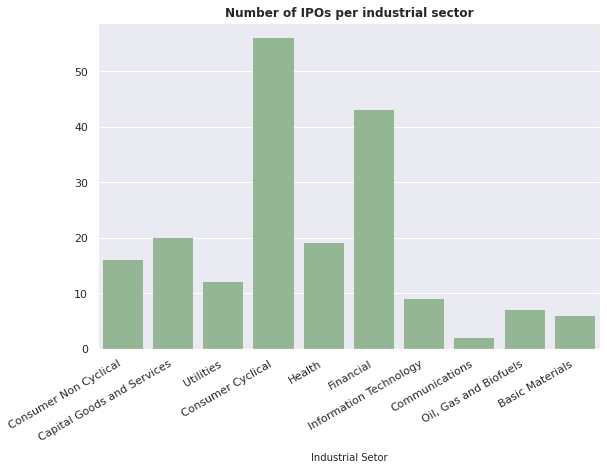

In [19]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='industrial_sector',
                   data=ipos,
                   color='darkseagreen')
ax = plt.title('Number of IPOs per industrial sector', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Industrial Setor', labelpad = 10, fontsize = 10)
ax = plt.ylabel('')  
ax = plt.xticks(rotation = 30, ha='right')

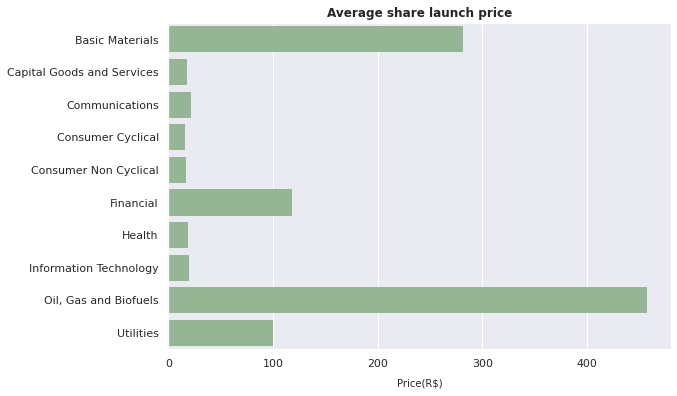

In [20]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='price_per_share', 
                 y='industrial_sector', 
                 data=ipos.groupby('industrial_sector')['price_per_share'].mean().reset_index(),
                 color='darkseagreen')
ax = plt.title('Average share launch price', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Price(R$)', labelpad = 10, fontsize = 10)
ax = plt.ylabel('') 

In [21]:
# Get data about canceled companies
cancel = pd.read_csv('data/canceled_companies.csv')
cancel.head()

,DENOMINAÇÃO SOCIAL,NOME DE PREGÃO,CÓDIGO,CNPJ,DATA REGISTRO,DATA DE CANCELAMENTO,ÚLTIMO ENDEREÇO E ; TELEFONE DA SEDE,MOTIVO DO CANCELAMENTO
0,521 PARTICIPAÇÕES S.A.,521 PARTICIP,QVUM,01.547.749/0001-16,7/11/1997,27/08/2007,"Rua Senador Dantas, 105 - 37º andar / Sala 04...",Mudou registro para Balcão Organizado (SOMA).
1,A.P. PARTICIPAÇÕES S.A.,A P PART,APPA,02.288.752/0001-25,1/21/1998,12/28/2004,"Av. Presidente Wilson,231 - \r\n18ºandar / Par...",Cancelou registro de Cia Aberta . Aprovado por...
2,ABC SUPERMERCADOS S.A.,ABC SUPERMER,PICO,02.258.274/0001-00,2/27/1998,12/20/2001,"Rua Paulo Barbosa,161 A 201\n; CEP: 25620 - 10...",Cancelou registro de Cia Aberta . Aprovado por...
3,ABYARA PLANEJAMENTO IMOBILIÁRIO S.A.,ABYARA,ABYA,07.794.351/0001-60,24/07/2006,6/1/2010,"Rua Gomes de Carvalho, 1510 - 6º andar; CEP:04...",Incorporada pela Agre Empreendimentos Imobiliá...
4,AÇOS VILLARES S.A.,ACOS VILL,AVIL,60.664.810/0001-74,11/11/1946,16/03/2011,"Av. das Nações Unidas, 8.501 - 5º andar / Part...",Incorporada pela Gerdau S.A. Cada 24 ações ON ...


In [22]:
# Correct columns naming
cancel.columns = [unidecode(col.lower().replace(' ','_')) for col in cancel.columns]
cancel.rename(columns={
    'nome_de_pregao':'trading_name',
    'codigo':'code_cancel',
    'data_registro': 'register_date',
    'data_de_cancelamento': 'cancel_date',
    'motivo_do_cancelamento': 'cancel_reason'
},inplace=True)
cancel = cancel[['trading_name', 'code_cancel', 'register_date', 'cancel_date', 'cancel_reason']]

In [23]:
# Cleaning string the column that will be used to merge the dataframes
cancel['trading_name'] = cancel['trading_name'].apply(str.strip)
# Merging the dataframes
ipos = pd.merge(ipos, cancel, how='left', on='trading_name')
# Creating a new column
ipos['is_cancel'] = ~ipos['cancel_date'].isna()
# Changing column datatype to datetime
ipos['cancel_date'] = pd.to_datetime(ipos['cancel_date'])

In [24]:
# Create new column with the time a company lasted on the stock exchange
canceled_stocks = ipos[ipos['is_cancel'] == True]
ipos['length_of_stay'] = (
    (canceled_stocks['cancel_date'] - canceled_stocks['start_date_of_negotiation']
).dt.days/365).astype(int)

In [25]:
# Sanity check for negative time lengths
ipos[ipos['length_of_stay'] < 0]

,trading_name,listing_segment,industry_classification,underwriter,classification,tipo,price_fixing_date,price_per_share,start_date_of_negotiation,number_of_individuals,...,others,start_year_of_negotiation,industrial_sector,subscetor,code_cancel,register_date,cancel_date,cancel_reason,is_cancel,length_of_stay
60,CREMER,NM,Pharmaceutical and Others Products,Merrill Lynch,IPO,ICVM 400,4/26/2007,17.5,2007-04-30,9370,...,0.0,2007,Health,Pharmaceutical and Others Products,CREM,1/3/1972,2004-05-17,Cancelou registro de Cia Aberta . O acionista ...,True,-2.0
132,IMC HOLDINGS,NM,Restaurants and Similars,BTG Pactual,IPO,ICVM 400,3/3/2011,13.5,2011-09-03,669,...,0.0,2011,Consumer Cyclical,Hotels and Restaurants,IMCH,18/12/2009,2010-03-31,Cancelou registro de Cia Aberta. Não estava ad...,True,-1.0
134,TIME FOR FUN,NM,Entertainment,Credit Suisse,IPO,ICVM 400,4/11/2011,16.0,2011-04-13,900,...,0.0,2011,Consumer Cyclical,"Travel, Entertainment and Leisure",SHOW,2/11/2008,2009-01-23,Cancelou registro de Cia Aberta . Aprovado por...,True,-2.0
165,PETROBRAS BR,NM,"Exploration, Refining and Distribution",Citi,IPO,ICVM 400,12/13/2017,15.0,2017-12-15,6808,...,1.0,2017,"Oil, Gas and Biofuels","Oil, Gas and Biofuels",BRDT,11/25/1993,2003-02-10,Cancelou registro de Cia Aberta . O acionista ...,True,-14.0


In [26]:
wrong_stocks = list(ipos[ipos['length_of_stay'] < 0]['trading_name'])
ipos[ipos['trading_name'].isin(wrong_stocks)]

,trading_name,listing_segment,industry_classification,underwriter,classification,tipo,price_fixing_date,price_per_share,start_date_of_negotiation,number_of_individuals,...,others,start_year_of_negotiation,industrial_sector,subscetor,code_cancel,register_date,cancel_date,cancel_reason,is_cancel,length_of_stay
60,CREMER,NM,Pharmaceutical and Others Products,Merrill Lynch,IPO,ICVM 400,4/26/2007,17.5,2007-04-30,9370,...,0.0,2007,Health,Pharmaceutical and Others Products,CREM,1/3/1972,2004-05-17,Cancelou registro de Cia Aberta . O acionista ...,True,-2.0
61,CREMER,NM,Pharmaceutical and Others Products,Merrill Lynch,IPO,ICVM 400,4/26/2007,17.5,2007-04-30,9370,...,0.0,2007,Health,Pharmaceutical and Others Products,CREM,7/10/2006,2018-11-27,Cancelou registro de cia aberta. A CM Hospital...,True,11.0
132,IMC HOLDINGS,NM,Restaurants and Similars,BTG Pactual,IPO,ICVM 400,3/3/2011,13.5,2011-09-03,669,...,0.0,2011,Consumer Cyclical,Hotels and Restaurants,IMCH,18/12/2009,2010-03-31,Cancelou registro de Cia Aberta. Não estava ad...,True,-1.0
133,IMC HOLDINGS,NM,Restaurants and Similars,BTG Pactual,IPO,ICVM 400,3/3/2011,13.5,2011-09-03,669,...,0.0,2011,Consumer Cyclical,Hotels and Restaurants,IMCH,3/3/2011,2015-04-20,Incorporada pela International Meal Company Al...,True,3.0
134,TIME FOR FUN,NM,Entertainment,Credit Suisse,IPO,ICVM 400,4/11/2011,16.0,2011-04-13,900,...,0.0,2011,Consumer Cyclical,"Travel, Entertainment and Leisure",SHOW,2/11/2008,2009-01-23,Cancelou registro de Cia Aberta . Aprovado por...,True,-2.0
165,PETROBRAS BR,NM,"Exploration, Refining and Distribution",Citi,IPO,ICVM 400,12/13/2017,15.0,2017-12-15,6808,...,1.0,2017,"Oil, Gas and Biofuels","Oil, Gas and Biofuels",BRDT,11/25/1993,2003-02-10,Cancelou registro de Cia Aberta . O acionista ...,True,-14.0


In [27]:
# Drop companies that were canceled and then reinstated more than once
ipos.drop([60,132] ,inplace=True)
# Correct data of companies that were incorrectly classified as canceled
cancel_cols = list(cancel.columns[1:]) + ['is_cancel', 'length_of_stay'] 
ipos.loc[[133, 134, 165], cancel_cols] = np.nan, np.nan, np.nan, np.nan, False, np.nan

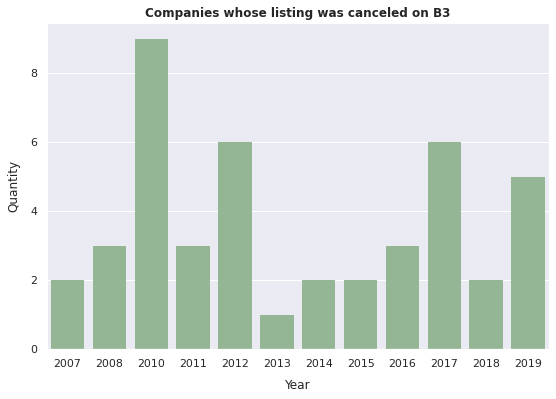

In [28]:
canceled_stocks = ipos[ipos['is_cancel'] == True]
plt.figure(figsize=(9, 6))
ax = sns.countplot(x=canceled_stocks.cancel_date.dt.year,
                   data=ipos,
                   color='darkseagreen')
ax = plt.title('Companies whose listing was canceled on B3', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Year', labelpad = 10)
ax = plt.ylabel('Quantity', labelpad = 10)  

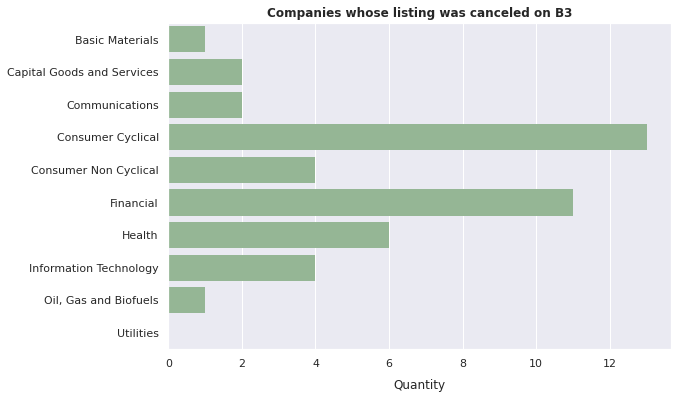

In [29]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='is_cancel', 
                 y='industrial_sector', 
                 data=ipos.groupby('industrial_sector')['is_cancel'].sum().reset_index(), 
                 color='darkseagreen')
ax = plt.title('Companies whose listing was canceled on B3', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Quantity', labelpad = 10)
ax = plt.ylabel('')  

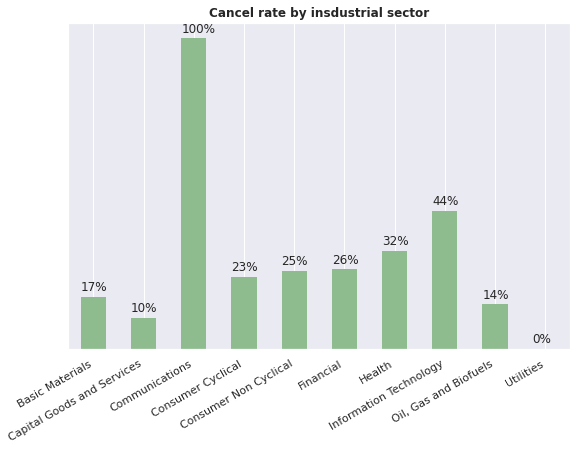

In [30]:
# Cancel rate by insdustrial sector
industrial_sector_count = ipos.groupby('industrial_sector').size()
canceled_companies = ipos.groupby('industrial_sector')['is_cancel'].sum()
cancel_rate = (canceled_companies/industrial_sector_count)*100
cancel_rate = cancel_rate.to_frame().rename(columns={0:'ratio'})

ax = cancel_rate.plot(
    kind='bar',
    color='darkseagreen',
    figsize=(9, 6)
)
ax = plt.legend().remove()
ax = plt.ylabel('')
ax = plt.xlabel('')
ax = plt.xticks(rotation = 30, ha='right')
ax = plt.yticks([])
ax = plt.title('Cancel rate by insdustrial sector', fontsize = 12, fontweight = 'bold')
for index, value in enumerate(cancel_rate.ratio):
    plt.text(index - 0.25, value + 2, '{:.0%}'.format(value/100))

In [31]:
# Average time of permanence of.
print(
    '{:.2f} years'.format(
        ipos['length_of_stay'].mean()
    )
)

5.48 years


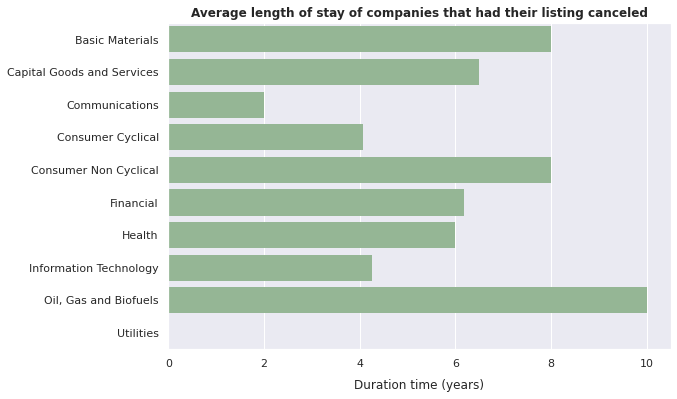

In [32]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='length_of_stay', 
                 y='industrial_sector', 
                 data=ipos.groupby('industrial_sector')['length_of_stay'].mean().reset_index(), 
                 color='darkseagreen')
ax = plt.title('Average length of stay of companies that had their listing canceled',
               fontsize=12,
               fontweight='bold')
ax = plt.xlabel('Duration time (years)', labelpad = 10)
ax = plt.ylabel('') 

In [33]:
# Top 10 companies that lasted less
ipos.sort_values(by=['length_of_stay'])[
    ['trading_name',
    'industry_classification',
    'start_date_of_negotiation',
    'cancel_date',
    'cancel_reason']
].head(10)

,trading_name,industry_classification,start_date_of_negotiation,cancel_date,cancel_reason
104,BMF,Diversified Financial Services,2007-11-30,2008-08-25,Incorporada pela BM&F Bovespa S.A. - Bolsa de ...
98,BOVESPA HLD,Diversified Financial Services,2007-10-26,2008-09-01,Incorporada pela BM&F Bovespa S.A. - Bolsa de ...
127,RAIA,Pharmaceutical and Others Products,2010-12-20,2012-02-14,Incorporada pela Drogasil S.A. Para cada ação ...
17,VIVAX,Telecommunications,2006-08-02,2007-10-19,Incorporada pela Net Serviços de Comunicação S...
112,TIVIT,Software and Services,2009-09-28,2011-01-17,Cancelou o registro de cia. aberta. A acionnis...
96,MARISA,"Apparel, Fabric and Footwear",2007-10-22,2010-07-27,Incorporada pela Marisa Lojas S.A. Cada ação O...
8,SUBMARINO,Diversified Retailers,2005-03-30,2007-08-13,Constituição da B2W Companhia Global do Varejo...
27,DATASUL,Software and Services,2006-02-06,2008-10-16,"Incorporada pela Makira do Brasil S.A., e subs..."
30,MEDIAL SAUDE,"Medical and Hospitalar Services, Analysis and ...",2006-09-22,2010-07-12,Incorporada pela Amil Assistência Medica Inter...
59,AGRA INCORP,Real Estate Development,2007-04-26,2010-06-01,Incorporada pela Agre Empreendimentos Imobiliá...


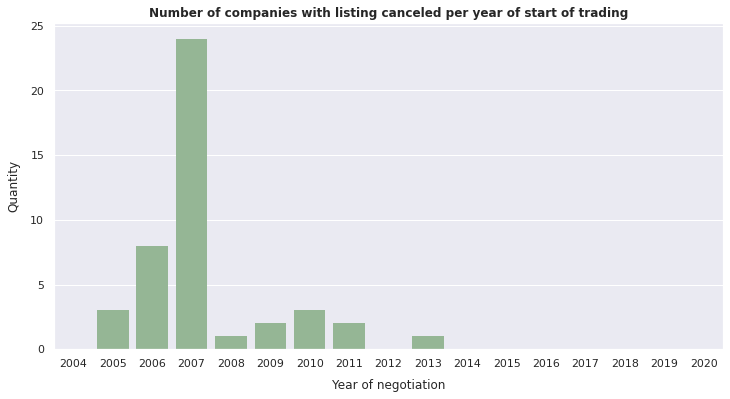

In [34]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='start_year_of_negotiation',
                 y='is_cancel',
                 data=ipos.groupby('start_year_of_negotiation')['is_cancel'].sum().reset_index(), 
                 color='darkseagreen')
ax = plt.title('Number of companies with listing canceled per year of start of trading',
               fontsize = 12, 
               fontweight = 'bold')
ax = plt.xlabel('Year of negotiation', labelpad = 10)
ax = plt.ylabel('Quantity', labelpad = 10)

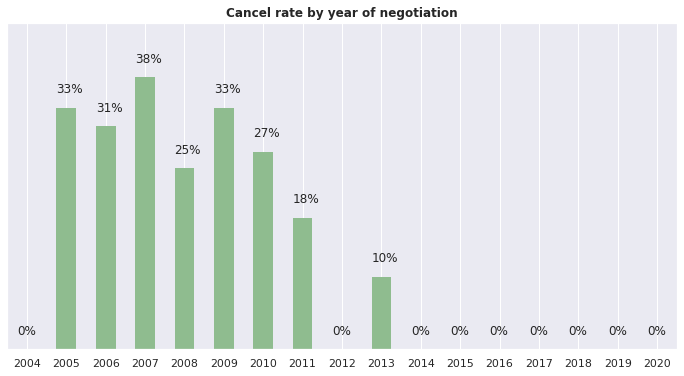

In [35]:
industrial_sector_count = ipos.groupby('start_year_of_negotiation').size()
canceled_companies = ipos.groupby('start_year_of_negotiation')['is_cancel'].sum()
cancel_rate = (canceled_companies/industrial_sector_count)*100
cancel_rate = cancel_rate.to_frame().rename(columns={0:'ratio'})

ax = cancel_rate.plot(
    kind='bar',
    color='darkseagreen',
    figsize=(12, 6)
)
ax = plt.legend().remove()
ax = plt.ylabel('')
ax = plt.xlabel('')
ax = plt.xticks(rotation = 0)
ax = plt.yticks([])
ax = plt.title('Cancel rate by year of negotiation', fontsize = 12, fontweight = 'bold')
ax = plt.ylim(0,45)
for index, value in enumerate(cancel_rate.ratio):
    plt.text(index - 0.25, value + 2, '{:.0%}'.format(value/100))

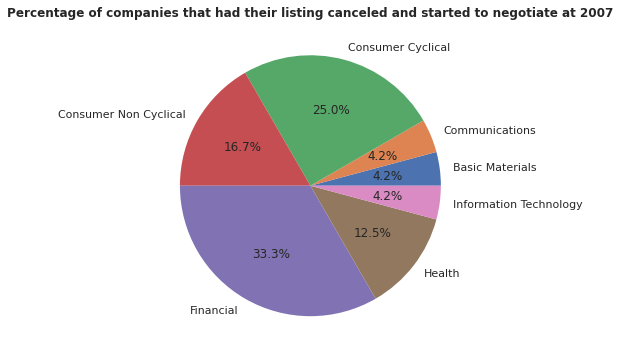

In [36]:
data = ipos[(ipos['start_year_of_negotiation'] == 2007) & (ipos['is_cancel'] == True)]
data = data.groupby('industrial_sector')['trading_name'].count().reset_index()
data = pd.DataFrame(data)
ax = data.plot.pie(y='trading_name', labels=data.industrial_sector, autopct='%1.1f%%', figsize=(9, 6))
ax = plt.legend().remove()
ax = plt.ylabel('')
ax = plt.title('Percentage of companies that had their listing canceled and started to negotiate at 2007', 
               fontsize = 12, 
               fontweight = 'bold')

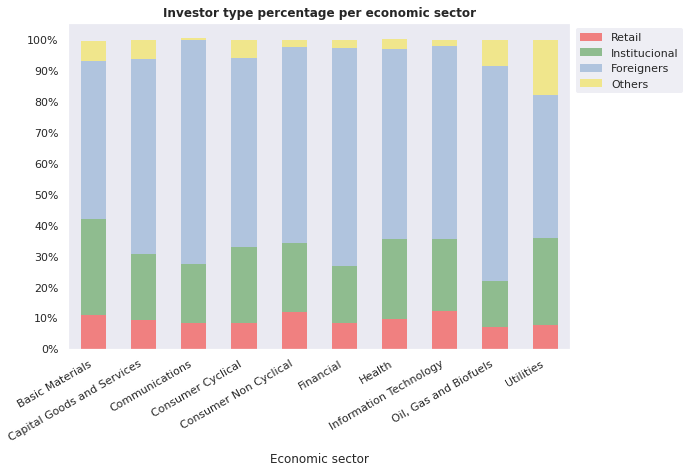

In [37]:
from matplotlib.ticker import PercentFormatter

is_valid_percentage = ipos[['retail', 'institutional', 'foreigners', 'others']].sum(axis=1) > 0
investors = (
    ipos[is_valid_percentage]
    .groupby('industrial_sector')
    [['retail', 'institutional', 'foreigners', 'others']]
    .mean())
investors.plot(
    kind='bar',
    stacked=True,
    figsize=(9, 6),
color=[
    'lightcoral',
    'darkseagreen',
    'lightsteelblue',
    'khaki'])
ax = plt.title(
    'Investor type percentage per economic sector', 
     fontsize = 12, 
     fontweight = 'bold')
ax = plt.xlabel('Economic sector', labelpad = 10)
ax = plt.legend(
    loc='upper left',
    bbox_to_anchor=(1,1),
    ncol=1,
    labels=['Retail','Institucional', 'Foreigners', 'Others'])
ax = plt.gca().yaxis.set_major_formatter(PercentFormatter())
ax = plt.yticks(np.arange(0, 101, 10))
ax = plt.xticks(rotation = 30, ha='right')
ax = plt.grid(axis='both', b=False); 

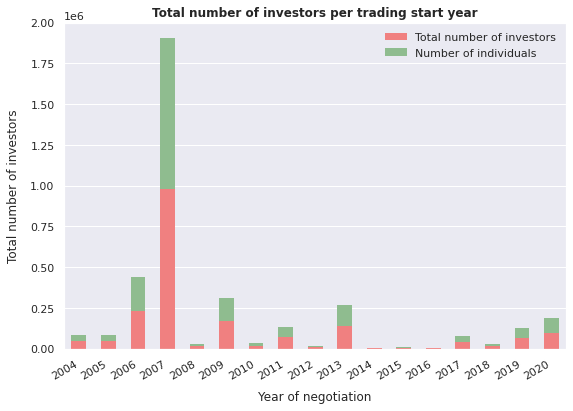

In [38]:
investors = ipos.groupby('start_year_of_negotiation')[['total_number_of_investors','number_of_individuals']].sum()
investors.plot(
    kind='bar',
    stacked=True,
    color=['lightcoral',
    'darkseagreen'],
    figsize=(9, 6))
ax = plt.title(
    'Total number of investors per trading start year', 
     fontsize = 12, 
     fontweight = 'bold')
ax = plt.xlabel('Year of negotiation', labelpad = 10)
ax = plt.ylabel('Total number of investors', labelpad = 10)
ax = plt.legend(labels=['Total number of investors','Number of individuals'])
ax = plt.xticks(rotation = 30, ha='right')
ax = plt.grid(axis='x', b=False);

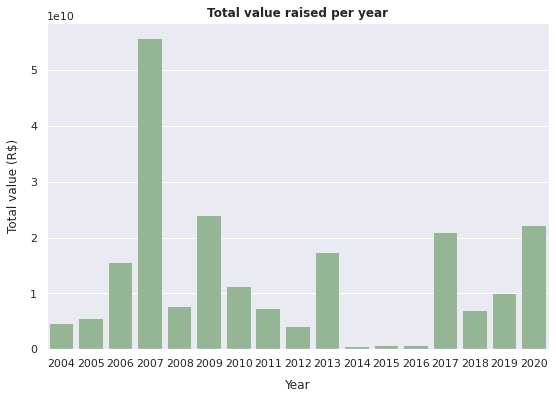

In [39]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    x='start_year_of_negotiation',
    y='total_value_r$',
    data=ipos.groupby('start_year_of_negotiation')['total_value_r$'].sum().reset_index(), 
    color='darkseagreen'
)
ax = plt.title('Total value raised per year', 
               fontsize = 12, 
               fontweight = 'bold')
ax = plt.xlabel('Year', labelpad = 10)
ax = plt.ylabel('Total value (R$)', labelpad = 10) 

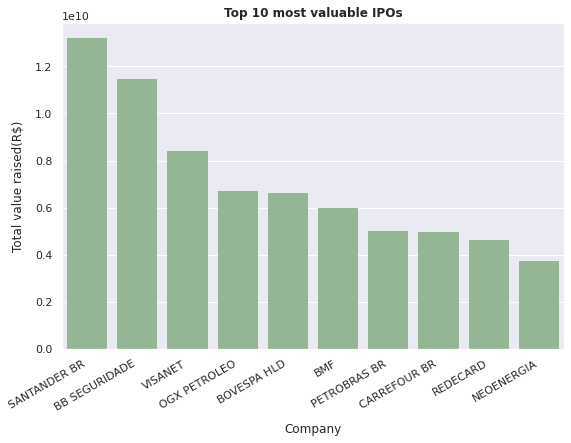

In [40]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    x='trading_name',
    y='total_value_r$',
    data=ipos.sort_values(by='total_value_r$', ascending=False).head(10), 
    color='darkseagreen'
)
ax = plt.title('Top 10 most valuable IPOs', 
               fontsize = 12, 
               fontweight = 'bold')
ax = plt.xlabel('Company', labelpad = 10)
ax = plt.xticks(rotation=30, ha='right')
ax = plt.ylabel('Total value raised(R$)', labelpad = 10) 